In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier


In [2]:
data = pd.read_csv('Healthcare-Diabetes.csv')

In [3]:
data.drop(['Id'], axis = 1, inplace = True)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome'>

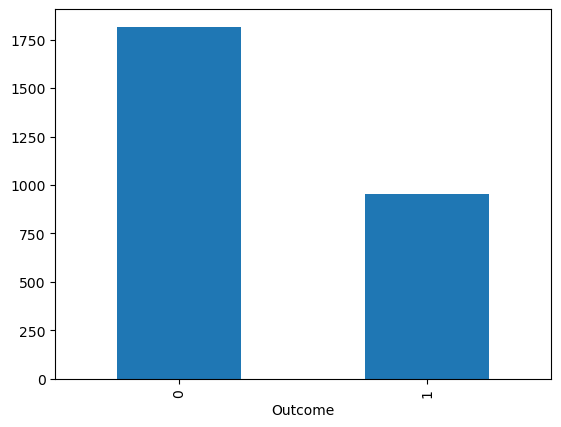

In [7]:
data["Outcome"].value_counts().plot(kind='bar')

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.duplicated().sum()

1990

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
bc = BaggingClassifier(n_estimators=150, random_state=2)

In [14]:
bc.fit(X_train,y_train)

BaggingClassifier(n_estimators=150, random_state=2)

In [15]:
print(bc.score(X_train,y_train))

1.0


0.9927797833935018


In [17]:
y_pred=bc.predict(X_test)

In [18]:
print(accuracy_score(y_test,y_pred))
print("--------------")
print(precision_score(y_test,y_pred))
print("--------------")
print(confusion_matrix(y_test,y_pred))

0.9927797833935018
--------------
1.0
--------------
[[370   0]
 [  4 180]]


In [19]:
import joblib
joblib.dump(bc,'diabetes.pkl')

['diabetes.pkl']

In [24]:
X_test.head(10).T

,738,2529,621,2336,886,1583,15,1771,1903,142
Pregnancies,2.000,3.00,2.000,3.00,4.000,8.000,7.000,5.000,3.000,2.000
Glucose,99.000,123.00,92.000,162.00,97.000,126.000,100.000,187.000,121.000,108.000
BloodPressure,60.000,100.00,76.000,0.00,60.000,88.000,0.000,76.000,52.000,52.000
SkinThickness,17.000,35.00,20.000,110.00,23.000,36.000,0.000,27.000,0.000,26.000
Insulin,160.000,240.00,0.000,215.00,0.000,108.000,0.000,207.000,0.000,63.000
BMI,36.600,57.30,24.200,48.70,28.200,38.500,30.000,43.600,36.000,32.500
DiabetesPedigreeFunction,0.453,0.88,1.698,0.52,0.443,0.349,0.484,1.034,0.127,0.318
Age,21.000,22.00,28.000,24.00,22.000,49.000,32.000,53.000,25.000,22.000


In [23]:
y_test.head(10)

738     0
2529    0
621     0
2336    0
886     0
1583    0
15      1
1771    1
1903    1
142     0
Name: Outcome, dtype: int64